# Video Game Engagement Analysis

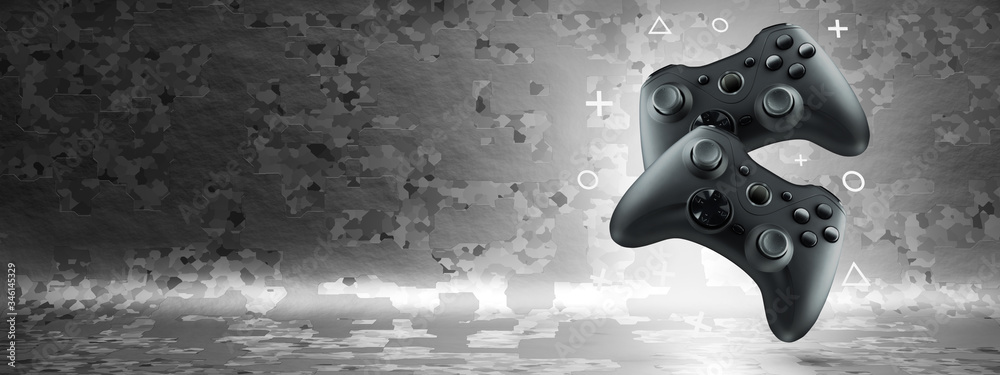

## Overview

The purpose of this project is to provide stakeholders with valuable insights regarding factors that most contribute to high engagement in video games as well as a predictive model that can be used to make recommendations for video game design and marketing to help with sales. 

## Business Understanding

The stakeholder for this project is any video game producer or marketer.  This model can be used for predictive modeling of video game player engagement patterns which can be used for optimization of game design and marketing strategies.  This can be used to help the business design games to be more engaging.  It can also help the business with targeting marketing towards individuals who are more engaged in games. 

## Data Understanding

The data comes from a Kaggle dataset. 

 Rabie El Kharoua. (2024). 🎮 Predict Online Gaming Behavior Dataset [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8742674

Mr. Kharoua owns the data and has made it available under the CC BY 4.0 license allowing anyone to use it as long as proper citation is given to the author.  The target variable is ‘High Engagement Level’.  The predictors available to us are Age, Gender, Location, Game Genre, Playtime, In Game Purchases, Game Difficulty, Sessions Per Week, Player Level, and Achievements Unlocked. The data types are integers, objects, and floats but they are all transformed to floating point numbers for analysis.  The dataset contains 40,034 entries but for this analysis I looked at only low engagement (10,000 entries) and high engagement (10,000 entries).  There is an even distribution of these data so there was no need to use any resampling methods.  The dataset originates from a confidential source and is scheduled to be released in the near future.  Therefore, we do not know how the data was collected or if it is correct. 


In [345]:
#Import Libraries and Data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sm
from sklearn.metrics import classification_report
from scipy import stats
import sklearn.preprocessing as preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn import svm
from scipy.stats import randint
from sklearn.tree import plot_tree
from sklearn import tree


gb = pd.read_csv('online_gaming_behavior_dataset.csv')

### Inspect the Contents of the dataframe

In [346]:
#Inspect the top 5 rows
gb.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [347]:
#Inspect the number of entries and features
gb.shape

(40034, 13)

In [348]:
#Inspect the number of non-null entries and data types
gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [349]:
#check the value counts for categorical data
categoricals = gb.select_dtypes("object")

for col in categoricals: 
    print(gb[col].value_counts(), "\n")

Male      23959
Female    16075
Name: Gender, dtype: int64 

USA       16000
Europe    12004
Asia       8095
Other      3935
Name: Location, dtype: int64 

Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: GameGenre, dtype: int64 

Easy      20015
Medium    12011
Hard       8008
Name: GameDifficulty, dtype: int64 

Medium    19374
High      10336
Low       10324
Name: EngagementLevel, dtype: int64 



In [350]:
#Inspect Descriptive Statistics for Variables
numericals = gb.select_dtypes("int64", "float64")

for col in numericals: 
    print(gb[col].describe(), "\n")

count    40034.000000
mean     29016.500000
std      11556.964675
min       9000.000000
25%      19008.250000
50%      29016.500000
75%      39024.750000
max      49033.000000
Name: PlayerID, dtype: float64 

count    40034.000000
mean        31.992531
std         10.043227
min         15.000000
25%         23.000000
50%         32.000000
75%         41.000000
max         49.000000
Name: Age, dtype: float64 

count    40034.000000
mean         0.200854
std          0.400644
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: InGamePurchases, dtype: float64 

count    40034.000000
mean         9.471774
std          5.763667
min          0.000000
25%          4.000000
50%          9.000000
75%         14.000000
max         19.000000
Name: SessionsPerWeek, dtype: float64 

count    40034.000000
mean        94.792252
std         49.011375
min         10.000000
25%         52.000000
50%         95.000000
75%        137.000000
m

In [351]:
#check for missing values
gb.isna().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

## Data Preparation

I prepared the data for modeling by converting all data into floating numbers, normalizing the numeric data so that it was all on the scale of 0 to 1, and by converting categorical data to numeric format through one-hot encoding.  This model is a binary categorical problem so to make the model I'm going to keep only high and low level engagement gamers because they have a similar number of entries. I dropped features as references features based on the feature that had the highest value count or was the median value.  I dropped the PlayerID feature because it was just an index column that didn't provide any insights into this analysis. I made a heat map to check to see if any of the predictors were correlated to each other so that there was no multicollinearity. 

In [352]:
#Drop all of the medium engagement entries
gb = gb[(gb['EngagementLevel']=='High')|(gb['EngagementLevel']=='Low')]

In [353]:
#Get dummy variables for categorical features
gb = pd.get_dummies(gb, dtype = float)

In [354]:
#drop features to avoid multicollinearity 
gb = gb.drop(['PlayerID', 'PlayTimeHours', 'Gender_Male', 'Location_USA', 'GameGenre_Strategy', 'GameDifficulty_Easy', 'EngagementLevel_Low'], axis=1)

In [355]:
#Data Ready for Modeling
gb.head()

,Age,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Gender_Female,Location_Asia,Location_Europe,Location_Other,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameDifficulty_Hard,GameDifficulty_Medium,EngagementLevel_High
2,22,0,16,142,35,41,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,37,0,2,81,74,22,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,25,0,1,50,13,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,38,0,13,95,99,36,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10,17,0,8,95,14,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


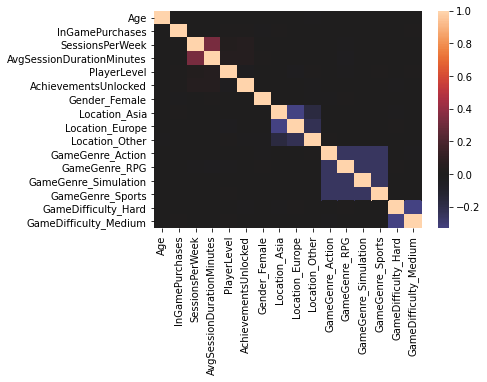

In [356]:
#create a heat map of the predictors
predictors = gb.drop(['EngagementLevel_High'], axis=1)
sns.heatmap(predictors.corr(), center=0);

## Modeling

This is a classification task.  The models I used are logistic regression, random forest, and support vector machines. 

#### Model Iteration 1

Here I made a logistic regression model using the statsmodels library.  I looked at which features were significant.  Then I made a new model without the significant features and found that there was no change to the Pseudo R-square between the two models.

In [357]:
X = gb.drop(columns=['EngagementLevel_High'], axis=1)
y = gb['EngagementLevel_High']

In [358]:
#Build a logistic regression model
X = sm.tools.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.226555
         Iterations 8


In [359]:
#View Results of Logistic Regression Model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     EngagementLevel_High   No. Observations:                20660
Model:                            Logit   Df Residuals:                    20643
Method:                             MLE   Df Model:                           16
Date:                  Tue, 06 Aug 2024   Pseudo R-squ.:                  0.6732
Time:                          20:20:13   Log-Likelihood:                -4680.6
converged:                         True   LL-Null:                       -14320.
Covariance Type:              nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -7.5016      0.164    -45.617      0.000      -7.824      -7.179
Age                          -0.0006      0.003     -0.202      0.840      -0.006       0.005
InGamePurchases               0.0920      0.068      1.346      0.178      -0.042       0.226
SessionsPerWeek               0.3588      0.005     72.165      0.000       0.349       0.369
AvgSessionDurationMinutes     0.0335      0.001     58.003      0.000       0.032       0.035
PlayerLevel                   0.0070      0.001      7.194      0.000       0.005       0.009
AchievementsUnlocked          0.0126      0.002      6.523      0.000       0.009       0.016
Gender_Female                 0.0330      0.056      0.586      0.558      -0.077       0.143
Location_Asia                 0.0166      0.075      0.220      0.826      -0.131       0.165
Location_Europe              -0.0953      0.067     -1.431      0.153      -0.226       0.035
Location_Other               -0.0282      0.098     -0.288      0.773      -0.220       0.163
GameGenre_Action              0.0433      0.087      0.498      0.619      -0.127       0.214
GameGenre_RPG                 0.0404      0.088      0.460      0.646      -0.132       0.212
GameGenre_Simulation          0.1034      0.087      1.186      0.236      -0.067       0.274
GameGenre_Sports             -0.0320      0.087     -0.369      0.712      -0.202       0.138
GameDifficulty_Hard           0.0874      0.073      1.205      0.228      -0.055       0.230
GameDifficulty_Medium         0.0294      0.064      0.460      0.646      -0.096       0.154
=============================================================================================
"""

In [360]:
significant_only = ['SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked', 'EngagementLevel_High']
gb_significant_only = (gb[significant_only])

y_sig = gb_significant_only['EngagementLevel_High']
X_sig = gb_significant_only.drop(columns='EngagementLevel_High', axis=1)

X_sig = sm.tools.add_constant(X_sig)
logit_model_sig = sm.Logit(y_sig, X_sig)
result_sig = logit_model_sig.fit()

result_sig.summary()

Optimization terminated successfully.
         Current function value: 0.226773
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     EngagementLevel_High   No. Observations:                20660
Model:                            Logit   Df Residuals:                    20655
Method:                             MLE   Df Model:                            4
Date:                  Tue, 06 Aug 2024   Pseudo R-squ.:                  0.6728
Time:                          20:20:13   Log-Likelihood:                -4685.1
converged:                         True   LL-Null:                       -14320.
Covariance Type:              nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -7.4540      0.116    -64.055      0.000      -7.682      -7.226
SessionsPerWeek               0.3585      0.005     72.228      0.000       0.349       0.368
AvgSessionDurationMinutes     0.0334      0.001     58.022      0.000       0.032       0.035
PlayerLevel                   0.0070      0.001      7.218      0.000       0.005       0.009
AchievementsUnlocked          0.0127      0.002      6.564      0.000       0.009       0.016
=============================================================================================
"""

#### Model Iteration 2

Here I ...

In [361]:
#Split the data again into targets and predictors
X = gb.drop(columns=['EngagementLevel_High'], axis=1)
y = gb['EngagementLevel_High']

In [362]:
#First I split the data into training and test sets beffore I normalize to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [363]:
#Normalize the data after the split on a scale from 0 to 1 since this is a binary classification problem

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train),
    # index is important to ensure we can concatenate with other columns
    index=X_train.index,
    columns=X_train.columns
)

In [364]:
#fit a logistic regression model to the training data
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_scaled, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [365]:
#Training Data Evaluation
#0 means the prediction and the actual value matched; 1 means the prediction and the actual value did not match

y_hat_train = logreg.predict(X_train_scaled)

train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0.0    13630
1.0     1865
Name: Residuals (counts), dtype: int64

0.0    0.879639
1.0    0.120361
Name: Residuals (proportions), dtype: float64


In [366]:
#Normalize the Test Data
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    index=X_test.index,
    columns=X_test.columns
)

In [367]:
#Test Data Evaluation
y_hat_test = logreg.predict(X_test_scaled)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0.0    4522
1.0     643
Name: Residuals (counts), dtype: int64

0.0    0.875508
1.0    0.124492
Name: Residuals (proportions), dtype: float64


In [368]:
def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            # CASE: TP 
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm

conf_matrix(y_test, y_hat_test)

{'TP': 2383, 'TN': 2139, 'FP': 418, 'FN': 225}

In [369]:
# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[2139  418]
 [ 225 2383]]


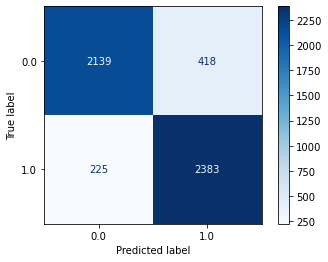

In [370]:
# Visualize your confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=model_log.classes_)
disp.plot(cmap=plt.cm.Blues)

In [371]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87      2557
         1.0       0.85      0.91      0.88      2608

    accuracy                           0.88      5165
   macro avg       0.88      0.88      0.88      5165
weighted avg       0.88      0.88      0.88      5165



For the positive example (predicting a high engagement gamer) this model has a precision of 85%, a recall of 91%, an F1-score of 88%, and an accuracy of 88%.  Recall is the most imporant metric because it limits false negatives which would have a higher cost to a company.  This would have a higher cost to the company because they would miss out on an opportunity for advertising or designing a game for a high engagement gamer.  A false positive would mean that advertising was used on a low engagement gamer or the game was designed for someone who won't be as engaged. 

Train AUC: 0.8797299322184078
Test AUC: 0.8751270870772162


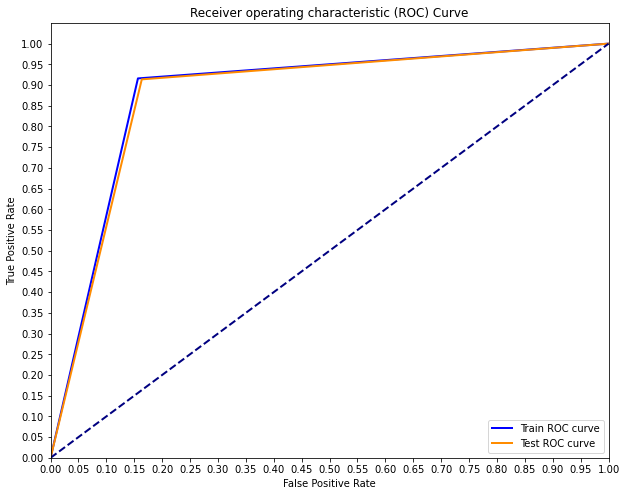

In [372]:
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_hat_train)
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_hat_test)

print('Train AUC: {}'.format(metrics.auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(metrics.auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Model Iteration 3

Add an intercept. 

In [373]:
#fit a logistic regression model to the training data
logreg_intercept = LogisticRegression(fit_intercept=True, C=1e12, solver='liblinear')
model_log_intercept = logreg_intercept.fit(X_train_scaled, y_train)
model_log_intercept

LogisticRegression(C=1000000000000.0, solver='liblinear')

In [374]:
y_hat_train_intercept = logreg_intercept.predict(X_train_scaled)

train_residuals_intercept = np.abs(y_train - y_hat_train_intercept)
print(pd.Series(train_residuals_intercept, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals_intercept, name="Residuals (proportions)").value_counts(normalize=True))

0.0    14465
1.0     1030
Name: Residuals (counts), dtype: int64

0.0    0.933527
1.0    0.066473
Name: Residuals (proportions), dtype: float64


In [375]:
#Test Data Evaluation
y_hat_test_intercept = logreg_intercept.predict(X_test_scaled)

test_residuals_intercept = np.abs(y_test - y_hat_test_intercept)
print(pd.Series(test_residuals_intercept, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals_intercept, name="Residuals (proportions)").value_counts(normalize=True))

0.0    4815
1.0     350
Name: Residuals (counts), dtype: int64

0.0    0.932236
1.0    0.067764
Name: Residuals (proportions), dtype: float64


In [376]:
conf_matrix(y_test, y_hat_test_intercept)

{'TP': 2429, 'TN': 2386, 'FP': 171, 'FN': 179}

In [377]:
cnf_matrix_intercept = confusion_matrix(y_test, y_hat_test_intercept)
print('Confusion Matrix:\n', cnf_matrix_intercept)

Confusion Matrix:
 [[2386  171]
 [ 179 2429]]


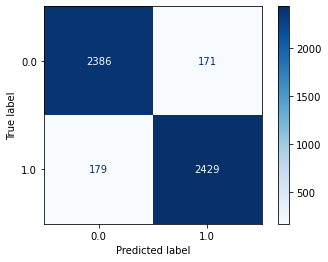

In [378]:
# Visualize your confusion matrix
disp_intercept = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_intercept, display_labels=model_log.classes_)
disp_intercept.plot(cmap=plt.cm.Blues)

In [379]:
print(classification_report(y_test, y_hat_test_intercept))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      2557
         1.0       0.93      0.93      0.93      2608

    accuracy                           0.93      5165
   macro avg       0.93      0.93      0.93      5165
weighted avg       0.93      0.93      0.93      5165



Train AUC: 0.9335258733197547
Test AUC: 0.9322448931238919


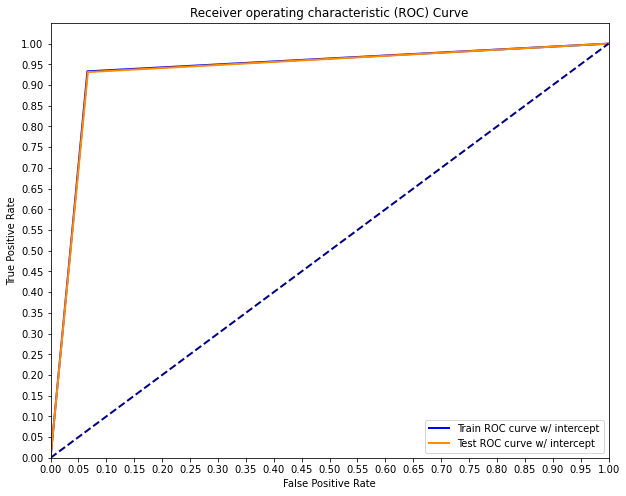

In [380]:
train_fpr_intercept, train_tpr_intercept, train_thresholds_intercept = metrics.roc_curve(y_train, y_hat_train_intercept)
test_fpr_intercept, test_tpr_intercept, test_thresholds_intercept = metrics.roc_curve(y_test, y_hat_test_intercept)

print('Train AUC: {}'.format(metrics.auc(train_fpr_intercept, train_tpr_intercept)))
print('Test AUC: {}'.format(metrics.auc(test_fpr_intercept, test_tpr_intercept)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr_intercept, train_tpr_intercept, color='blue',
         lw=lw, label='Train ROC curve w/ intercept')
plt.plot(test_fpr_intercept, test_tpr_intercept, color='darkorange',
         lw=lw, label='Test ROC curve w/ intercept')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Model Iteration 4

Altering Regularization Parameter
Source: [github](https://github.com/learn-co-curriculum/dsc-logistic-regression-model-comparisons-lab/blob/solution/index.ipynb)

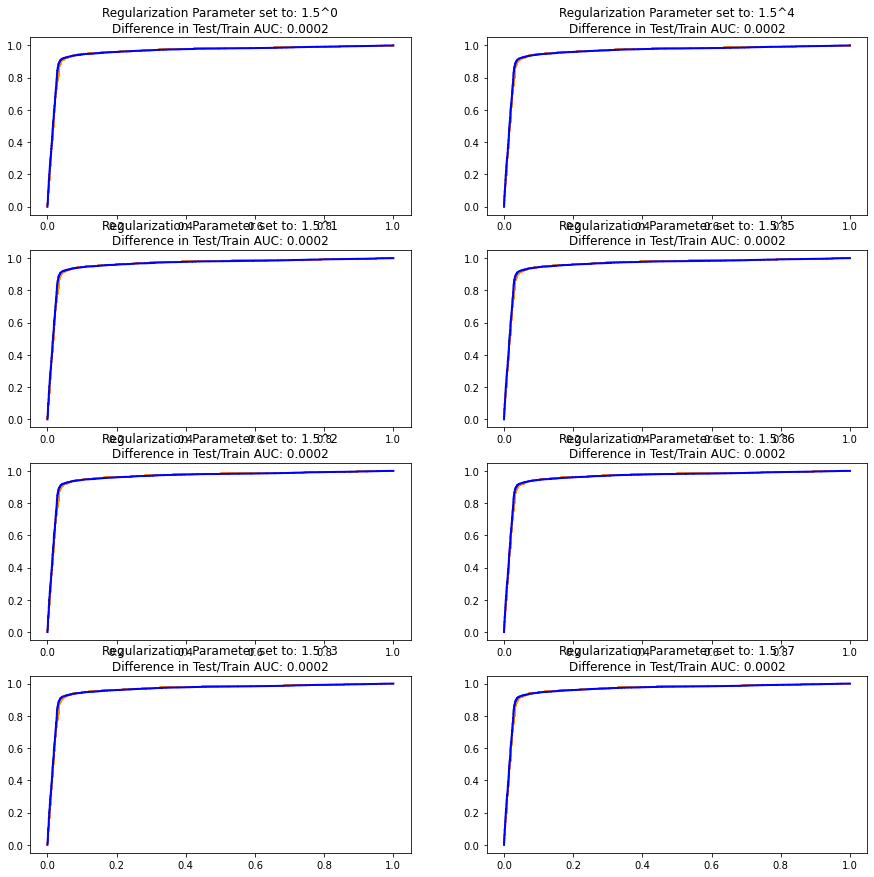

In [381]:
fig, axes = plt.subplots(4,2, figsize=(15, 15))
for n in range(8):
    i = n%4
    j = n//4
    ax = axes[i, j]
    # Fit a model
    logreg = LogisticRegression(fit_intercept=True, C=1.5**(n), solver='liblinear')
    logreg.fit(X_train, y_train)
    
    y_test_score = logreg.decision_function(X_test)
    y_train_score = logreg.decision_function(X_train)

    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_score)
    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_score)
    
    test_auc = metrics.auc(test_fpr, test_tpr)
    train_auc = metrics.auc(train_fpr, train_tpr)
    auc_diff = round(train_auc - test_auc, 4)

#     print('Test AUC with C=1.5^{}: {}'.format(n*2, auc(test_fpr, test_tpr)))
#     print('Train AUCwith C=1.5^{}: {}'.format(n*2, auc(train_fpr, train_tpr)))
    # Add the plot
    ax.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')
    ax.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='Train ROC curve')
    
    ax.set_title('Regularization Parameter set to: 1.5^{}\nDifference in Test/Train AUC: {}'.format(n, auc_diff))

#### Model Iteration 5

Random Forest Model

In [382]:
rf = RandomForestClassifier()
model_rf = rf.fit(X_train_scaled, y_train)
model_rf

RandomForestClassifier()

In [383]:
y_pred_rf = rf.predict(X_test_scaled)

In [384]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      2557
         1.0       0.94      0.93      0.93      2608

    accuracy                           0.93      5165
   macro avg       0.93      0.93      0.93      5165
weighted avg       0.93      0.93      0.93      5165



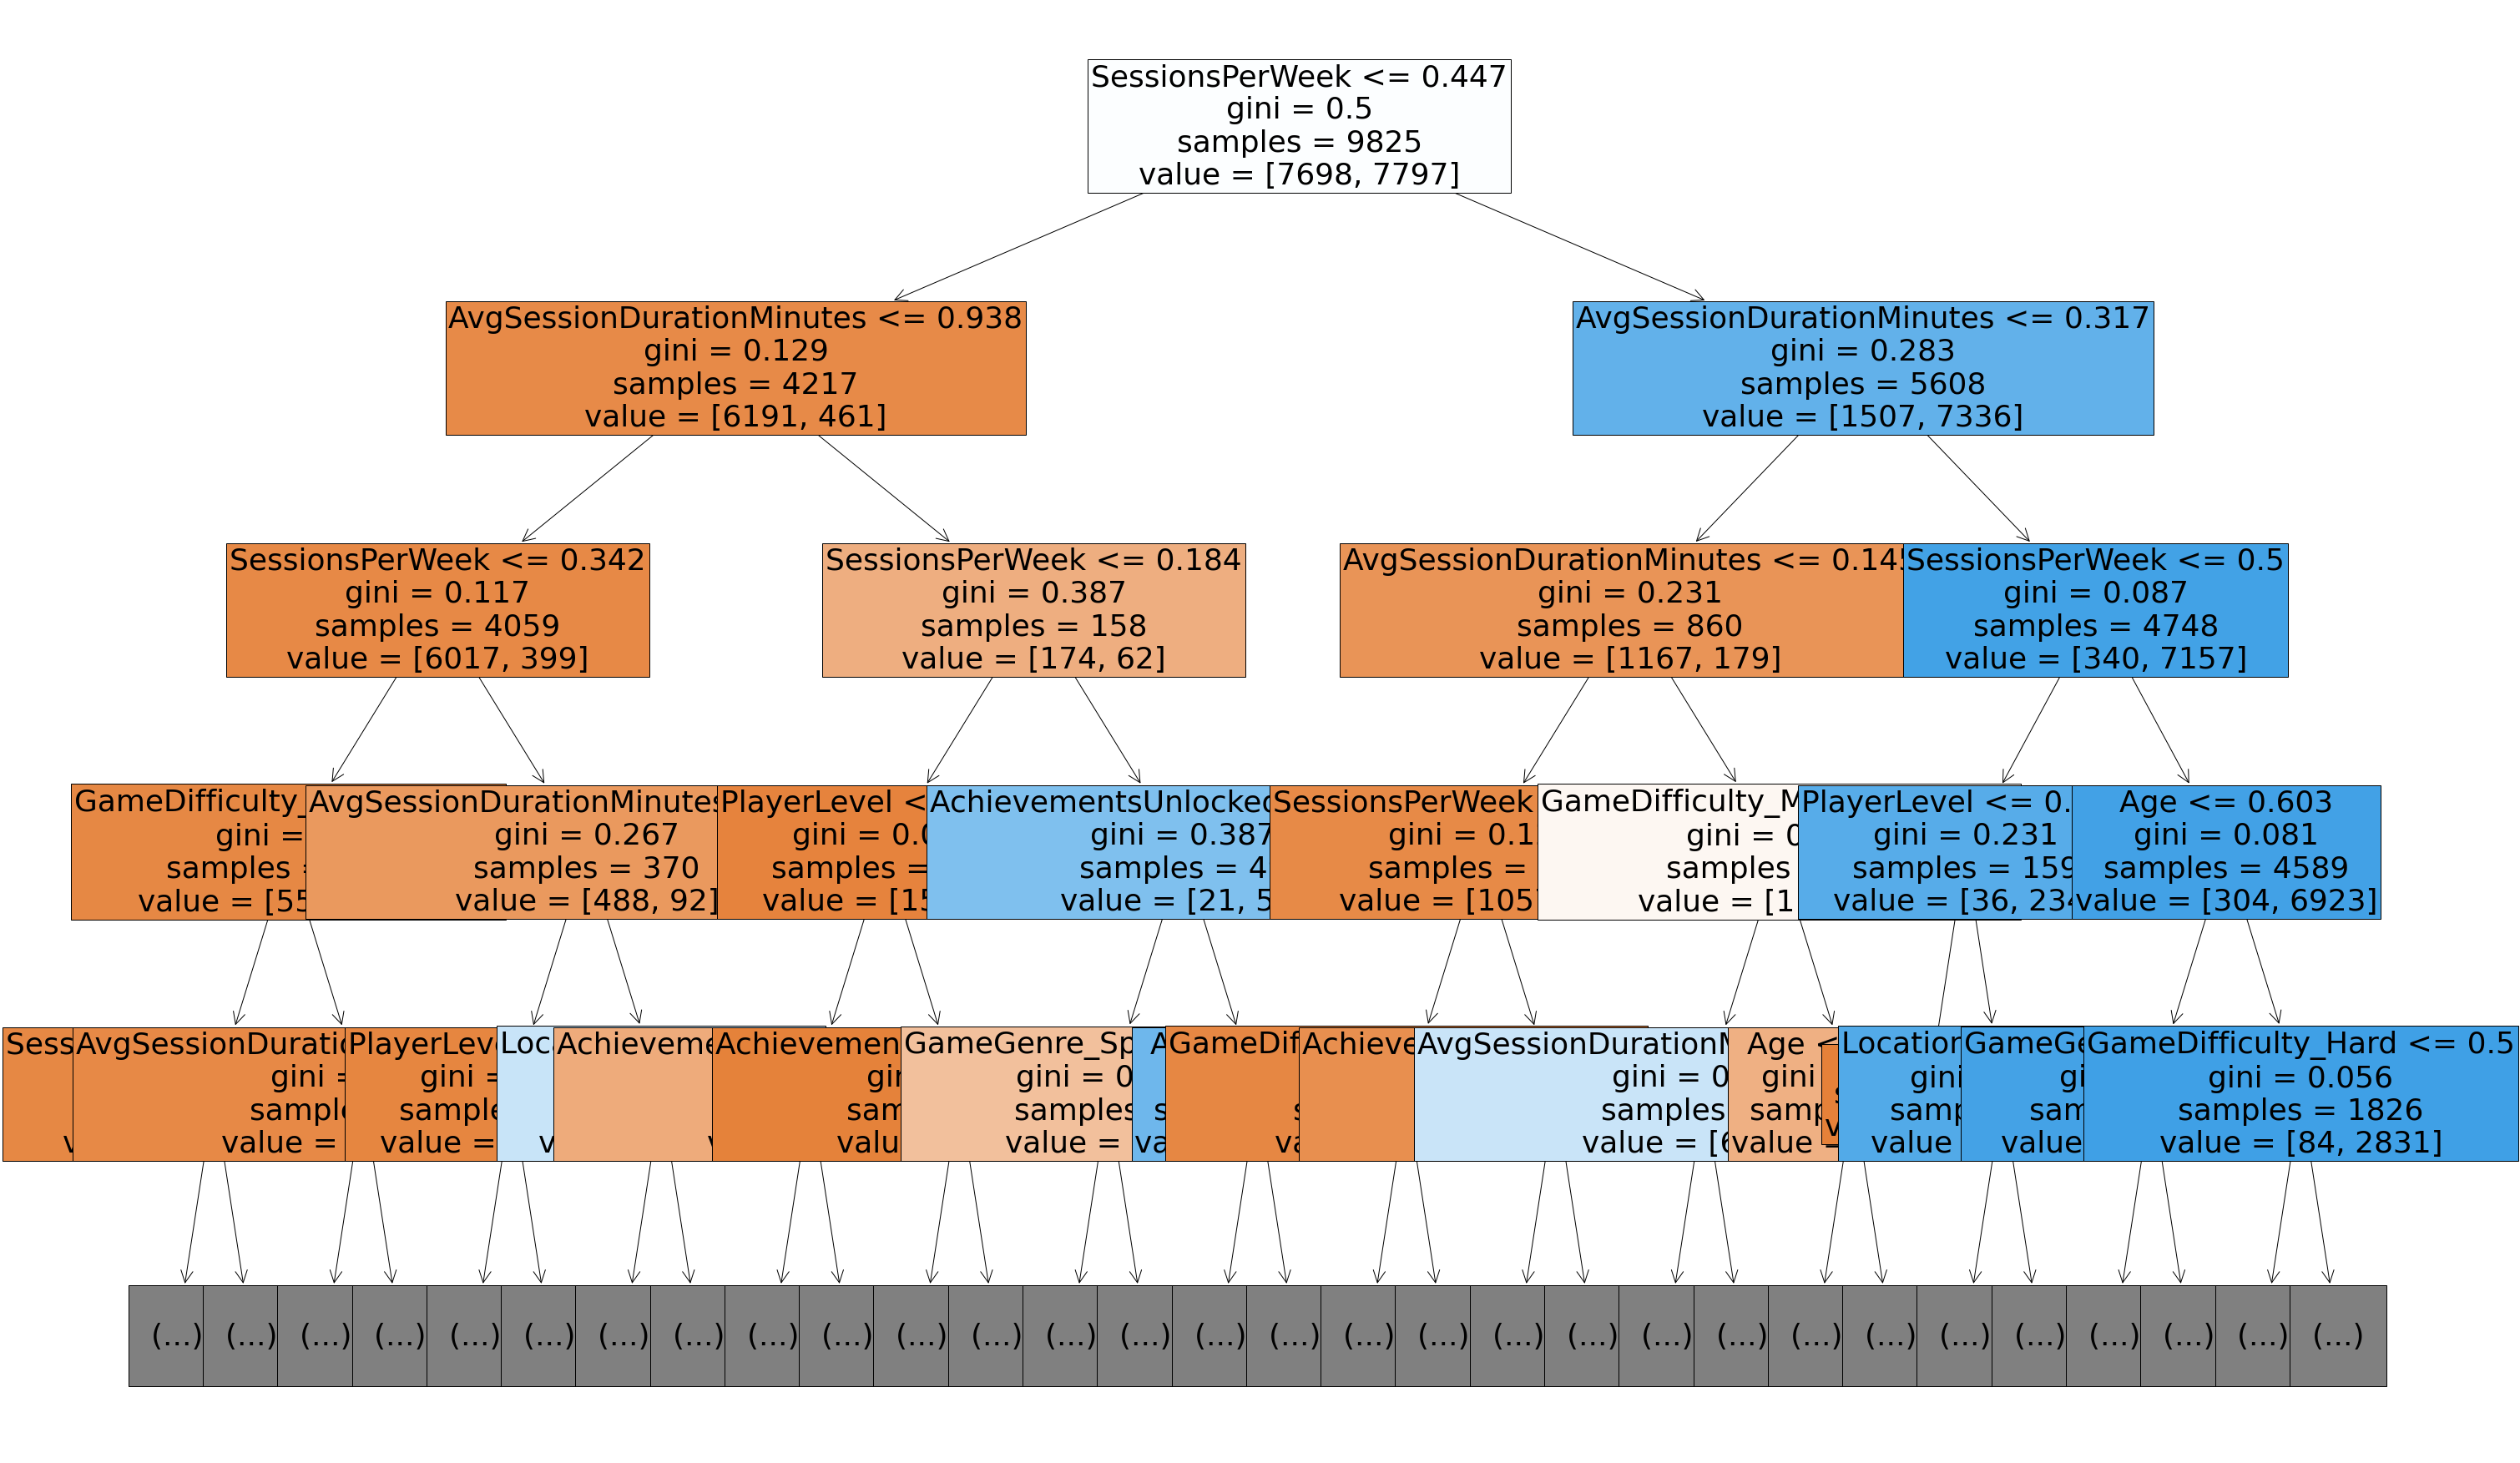

In [385]:
individual_tree = rf.estimators_[0]

plt.figure(figsize=(48,32))
plot_tree(individual_tree, max_depth=4, feature_names = X.columns, filled=True, fontsize=36)
plt.show()

In [386]:
conf_matrix(y_test, y_pred_rf)

{'TP': 2414, 'TN': 2407, 'FP': 150, 'FN': 194}

In [387]:
cnf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:\n', cnf_matrix_rf)

Confusion Matrix:
 [[2407  150]
 [ 194 2414]]


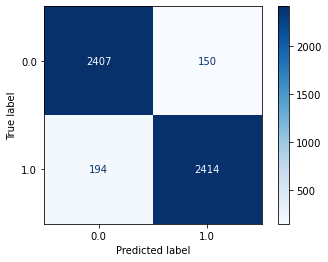

In [388]:
# Visualize your confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_rf, display_labels=model_log.classes_)
disp_rf.plot(cmap=plt.cm.Blues)

#### Model Iteration 6

Random Forest Hyperparameter Tuning

In [392]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000189BF4C5B20>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000189C3D46520>})

In [397]:
print('Best hyperparameters:', rand_search.best_params_)

Best hyperparameters: {'max_depth': 12, 'n_estimators': 109}


In [398]:
best_rf = rand_search.best_estimator_

In [408]:
rf_best_params = RandomForestClassifier(max_depth=12, n_estimators=109)
rf_best_params.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=12, n_estimators=109)

In [409]:
y_pred_best_params = rf_best_params.predict(X_test_scaled)

In [411]:
print(classification_report(y_test, y_pred_best_params))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      2557
         1.0       0.94      0.93      0.94      2608

    accuracy                           0.94      5165
   macro avg       0.94      0.94      0.94      5165
weighted avg       0.94      0.94      0.94      5165



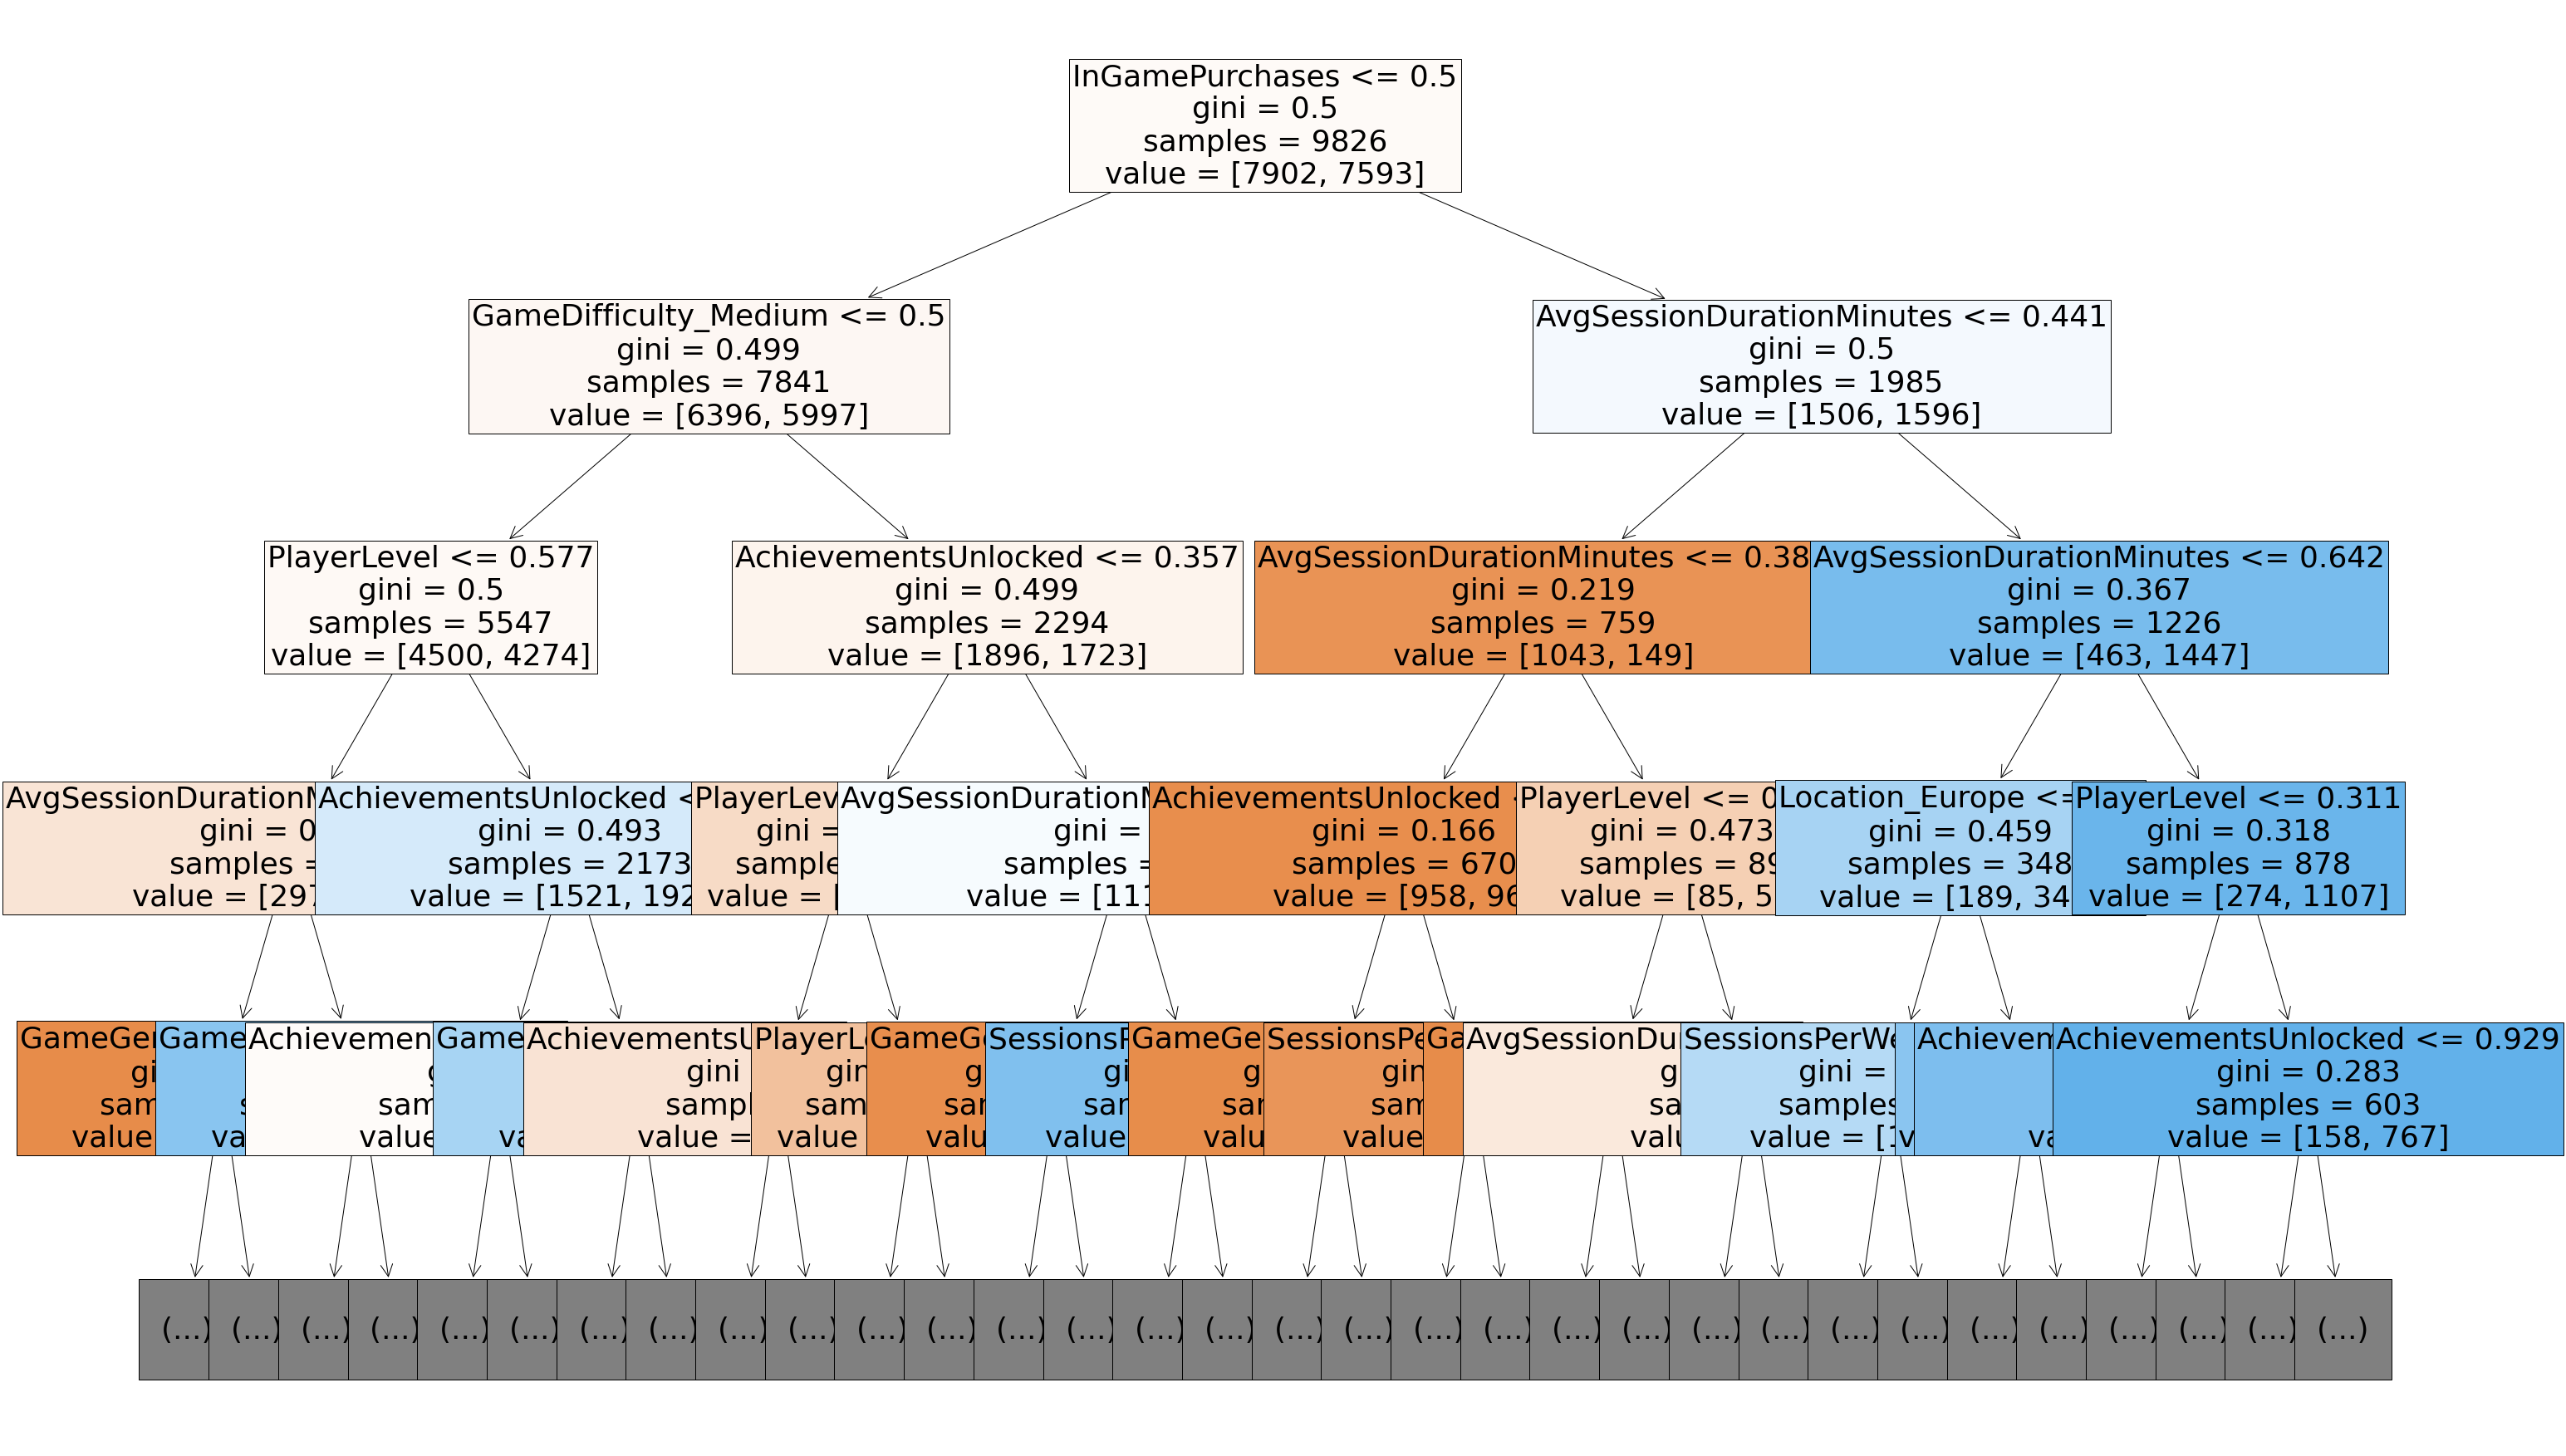

In [412]:
individual_tree_best_params = rf_best_params.estimators_[0]

plt.figure(figsize=(48,32))
plot_tree(individual_tree_best_params, max_depth=4, feature_names = X.columns, filled=True, fontsize=36)
plt.show()

In [413]:
conf_matrix(y_test, y_pred_best_params)

{'TP': 2420, 'TN': 2410, 'FP': 147, 'FN': 188}

In [414]:
cnf_matrix_best_params = confusion_matrix(y_test, y_pred_best_params)
print('Confusion Matrix:\n', cnf_matrix_best_params)

Confusion Matrix:
 [[2410  147]
 [ 188 2420]]


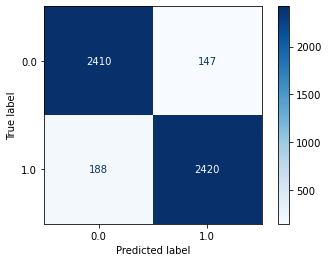

In [415]:
# Visualize your confusion matrix
disp_rf_best_params = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_best_params, display_labels=model_log.classes_)
disp_rf_best_params.plot(cmap=plt.cm.Blues)

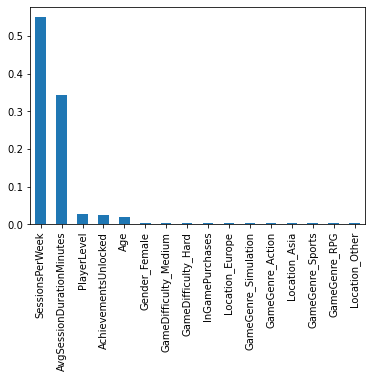

In [416]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf_best_params.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

#### Model Iteration 7

SVM Model

In [417]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = clf.predict(X_test)

In [418]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      2557
         1.0       0.94      0.93      0.93      2608

    accuracy                           0.93      5165
   macro avg       0.93      0.93      0.93      5165
weighted avg       0.93      0.93      0.93      5165



In [419]:
conf_matrix(y_test, y_pred_svm)

{'TP': 2425, 'TN': 2389, 'FP': 168, 'FN': 183}

In [421]:
cnf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix:\n', cnf_matrix_svm)

Confusion Matrix:
 [[2389  168]
 [ 183 2425]]


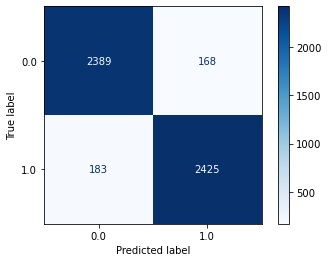

In [422]:
# Visualize your confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_svm, display_labels=model_log.classes_)
disp_svm.plot(cmap=plt.cm.Blues)

#### Model Iteration 8

SVM with polynomial kernal. 

In [423]:
#Create a svm Classifier
clf_polynomial = svm.SVC(kernel='poly') # Polynomial Kernel

#Train the model using the training sets
clf_polynomial.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_polynomial = clf_polynomial.predict(X_test)

In [424]:
print(classification_report(y_test, y_pred_polynomial))

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      2557
         1.0       0.95      0.92      0.93      2608

    accuracy                           0.93      5165
   macro avg       0.94      0.94      0.93      5165
weighted avg       0.94      0.93      0.93      5165



In [425]:
conf_matrix(y_test, y_pred_polynomial)

{'TP': 2410, 'TN': 2419, 'FP': 138, 'FN': 198}

In [426]:
cnf_matrix_polynomial = confusion_matrix(y_test, y_pred_polynomial)
print('Confusion Matrix:\n', cnf_matrix_polynomial)

Confusion Matrix:
 [[2419  138]
 [ 198 2410]]


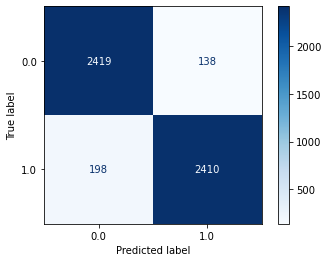

In [427]:
# Visualize your confusion matrix
disp_svm_polynomial = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_polynomial, display_labels=model_log.classes_)
disp_svm_polynomial.plot(cmap=plt.cm.Blues)

#### Model Iteration 9

SVM with RBF Kernal

In [428]:
#Create a svm Classifier
clf_rbf = svm.SVC(kernel='rbf') # RBF Kernel

#Train the model using the training sets
clf_rbf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_rbf = clf_rbf.predict(X_test)

In [429]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      2557
         1.0       0.94      0.93      0.93      2608

    accuracy                           0.93      5165
   macro avg       0.93      0.93      0.93      5165
weighted avg       0.93      0.93      0.93      5165



In [430]:
conf_matrix(y_test, y_pred_rbf)

{'TP': 2420, 'TN': 2407, 'FP': 150, 'FN': 188}

In [431]:
cnf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
print('Confusion Matrix:\n', cnf_matrix_rbf)

Confusion Matrix:
 [[2407  150]
 [ 188 2420]]


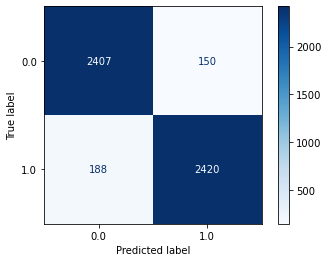

In [432]:
# Visualize your confusion matrix
disp_svm_rbf = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_rbf, display_labels=model_log.classes_)
disp_svm_rbf.plot(cmap=plt.cm.Blues)

#### Model Iteration 10

Best SVM model with a changed C parameter

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf_c = svm.SVC(kernel='linear', C=1000) # Linear Kernel

#Train the model using the training sets
clf_c.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm_c = clf_c.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_svm_c)